In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import special, optimize, signal
%matplotlib inline
plt.rcParams["figure.figsize"] = (6/2 * (1 + np.sqrt(5)), 6)
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["lines.markersize"] = 9
plt.rcParams["lines.linewidth"] = 3
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["grid.linewidth"] = 1.2
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 20
plt.rcParams["legend.fontsize"] = 15

In [16]:
err_f = lambda x, a, b, c, d: a + b * sp.special.erf(np.sqrt(2)*(x - c) / d)
cos_sq = lambda x, a, w, c, d: a * np.cos(w * x + c) ** 2 + d

## Graficos de funciones a ajustar

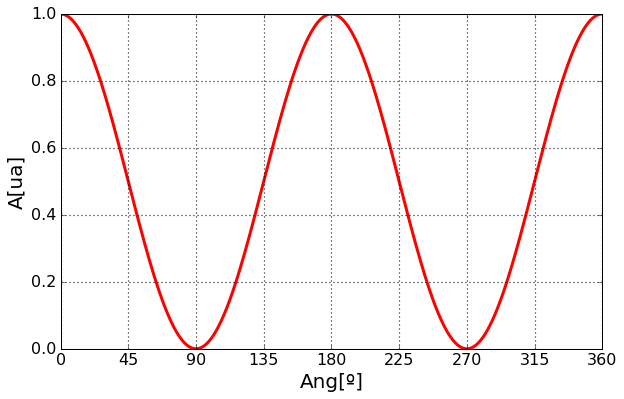

In [18]:
t = np.linspace(0, 360, 1000)
plt.plot(t, cos_sq(t, 1, 1 * np.pi/180, 0, 0), "r-")
plt.xlabel("Ang[º]")
plt.ylabel("A[ua]")
plt.xticks(range(0, 360 + 45, 45));
plt.xlim([0, 360]);
plt.savefig("malus.png", bbox_inches="tight")

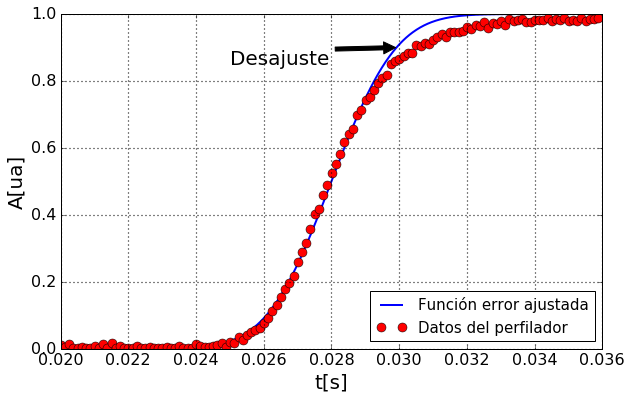

In [93]:
A = np.loadtxt("../perfilador/mediciones/pruebas/2015/med_10_11/calibradas/data_15_52.csv")
A[:,0] /= 1e6
A[:,0] -= A[:,0].min()
A[:,1] /= A[:,1].max()
ind = (A[:,0] < 0.036) & (A[:,0] > 0.02)
t = np.linspace(A[ind,0].min(),A[ind,0].max(),1000)

beta0 = [0.5, 0.5, 0.028, 0.003]

p, cov = sp.optimize.curve_fit(err_f, A[:,0], A[:,1], p0 = beta0)

plt.plot(t, err_f(t,*beta0), "b-", label="Función error ajustada")
plt.plot(A[ind,0],A[ind,1], "ro", label="Datos del perfilador")
plt.xlabel("t[s]")
plt.ylabel("A[ua]")
plt.annotate('Desajuste', xy=(0.030, 0.9), xytext=(0.025, 0.85),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(loc=4)
plt.savefig("fit_data_anotado.png", bbox_inches="tight")

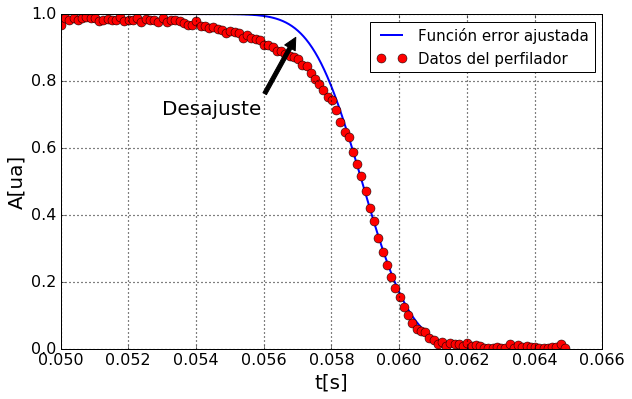

In [119]:
A = np.loadtxt("../perfilador/mediciones/pruebas/2015/med_10_11/data_15_52.csv")
A[:,0] /= 1e6
A[:,0] -= A[:,0].min()
A[:,1] /= A[:,1].max()
ind = (A[:,0] < 0.065)  & (A[:,0] > 0.05)
t = np.linspace(A[ind,0].min(),A[ind,0].max(),1000)

beta0 = [0.5,- 0.5, 0.0589, 0.0023]

p, cov = sp.optimize.curve_fit(err_f, A[ind,0], A[ind,1], p0 = beta0)

plt.plot(t, err_f(t,*beta0), "b-", label="Función error ajustada")
plt.plot(A[ind,0],A[ind,1], "ro", label="Datos del perfilador")
plt.xlabel("t[s]")
plt.ylabel("A[ua]")
plt.annotate('Desajuste', xy=(0.057, 0.94), xytext=(0.053, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(loc=0)
plt.savefig("fit_data_anotado_bajada.png", bbox_inches="tight")

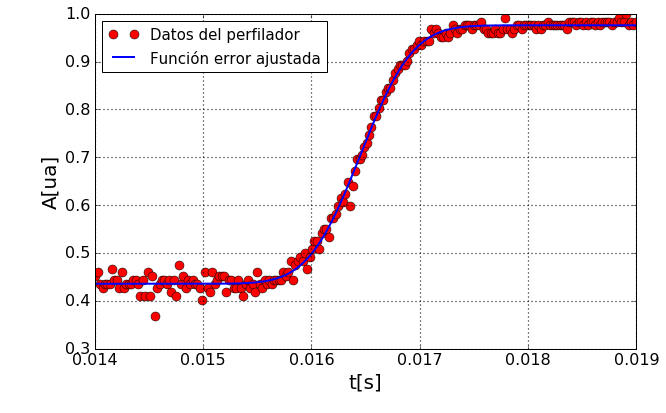

In [146]:
A = np.loadtxt("../perfilador/mediciones/plastico_15_5.csv")
A[:,0] /= 1e6
A[:,0] -= A[:,0].min()
A[:,1] /= A[:,1].max()
ind = (A[:,0] < 0.019)  & (A[:,0] > 0.014)
t = np.linspace(A[ind,0].min(),A[ind,0].max(),1000)

beta0 = [0.7, 0.3, 0.0165, 0.0007]

p, cov = sp.optimize.curve_fit(err_f, A[ind,0], A[ind,1], p0 = beta0)

plt.plot(A[ind,0],A[ind,1], "ro", label="Datos del perfilador")
plt.plot(t, err_f(t,*p), "b-", label="Función error ajustada")

plt.xlabel("t[s]")
plt.ylabel("A[ua]")
plt.annotate('Desajuste', xy=(0.057, 0.94), xytext=(0.053, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(loc=0)
plt.savefig("fit_data_plastico_subida.png", bbox_inches="tight")

-3.1529517305


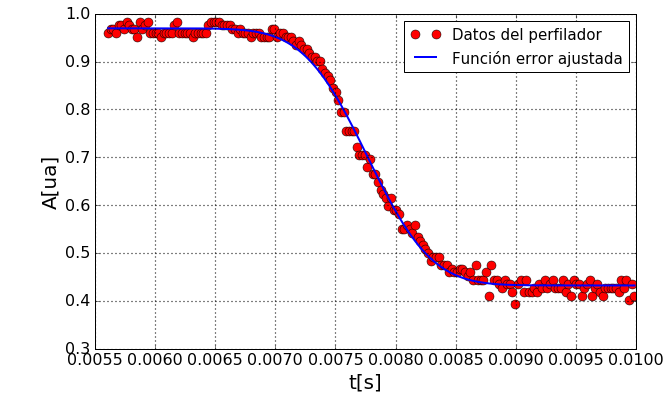

In [153]:
A = np.loadtxt("../perfilador/mediciones/plastico_15_5.csv")
A[:,0] /= 1e6
A[:,0] -= A[:,0].min()
A[:,1] /= A[:,1].max()
ind = (A[:,0] < 0.010)  & (A[:,0] > 0.0056)
t = np.linspace(A[ind,0].min(),A[ind,0].max(),1000)

beta0 = [0.7, 0.3, 0.007, 0.0007]

p, cov = sp.optimize.curve_fit(err_f, A[ind,0], A[ind,1], p0 = beta0)

plt.plot(A[ind,0],A[ind,1], "ro", label="Datos del perfilador")
plt.plot(t, err_f(t,*p), "b-", label="Función error ajustada")

plt.xlabel("t[s]")
plt.ylabel("A[ua]")
plt.annotate('Desajuste', xy=(0.057, 0.94), xytext=(0.053, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(loc=0)
#plt.savefig("fit_data_plastico_bajada.png", bbox_inches="tight")
print(2 * p[3] * 2 * np.pi * 30 * 10)

3.09937600773


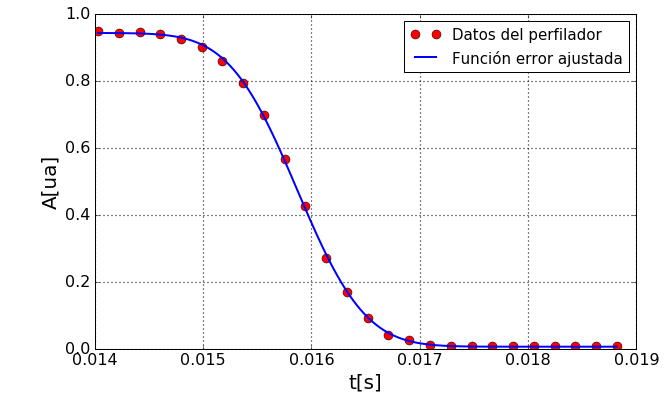

In [164]:
A = np.loadtxt("../perfilador/mediciones/spim/spim_inicio_riel.csv", delimiter=",")
A[:,0] /= 1e6
A[:,0] -= A[:,0].min()
A[:,1] /= A[:,1].max()
ind = (A[:,0] < 0.019)  & (A[:,0] > 0.014)
#ind = A[:,0] < A[:,0].max()
t = np.linspace(A[ind,0].min(),A[ind,0].max(),1000)

beta0 = [0.7, 0.3, 0.0165, 0.0007]

p, cov = sp.optimize.curve_fit(err_f, A[ind,0], A[ind,1], p0 = beta0)

plt.plot(A[ind,0],A[ind,1], "ro", label="Datos del perfilador")
plt.plot(t, err_f(t,*p), "b-", label="Función error ajustada")

plt.xlabel("t[s]")
plt.ylabel("A[ua]")
plt.annotate('Desajuste', xy=(0.057, 0.94), xytext=(0.053, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(loc=0)
plt.savefig("fit_data_amp.png", bbox_inches="tight")
print(2*p[3]*2*np.pi*25*10)

Error relativo 1.6251091682372436


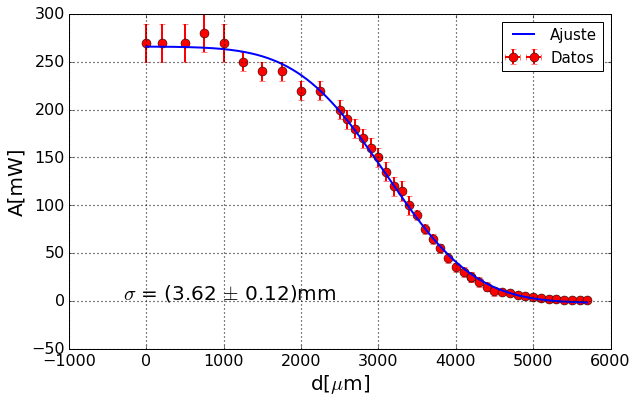

In [171]:
data = np.loadtxt('../perfilador/mediciones/calibracion_fibra_f280_d_7cm/calibracion_x.csv', delimiter=',')

x = data[:,0]
y = data[:,1]
yerr = data[:,2]
xerr = np.ones_like(data[:,0])


plt.figure()

#plt.grid()
plt.tick_params(axis="both")
plt.xlabel("d[$\mu$m]")
plt.ylabel("A[mW]")

plt.errorbar(x, y, yerr=yerr, xerr=xerr, fmt="ro", label="Datos")

p0 = [y.max()/2, -y.max()/2, (x.max() + x.min())/2, 0.5*(x.max() - x.min())]
p, cov = sp.optimize.curve_fit(err_f, x, y, p0 = p0)

t = np.linspace(x.min(),x.max(),1000)
plt.plot(t,err_f(t,*p),"b-", label="Ajuste")

txt = "$\sigma$ = ({:.2f} $\pm$ {:.2f})mm".format(2*p[3]/1000, 2*np.sqrt(cov[3,3])/1000)
plt.text(0.1,0.15, txt, transform=plt.gca().transAxes) 
print("Error relativo {}".format(100 * np.sqrt(cov[3,3]) / (2 * p[3]) ))
plt.savefig("calibracion.png", bbox_inches="tight")
plt.legend(loc=0)

## Rojo

0.386666666667


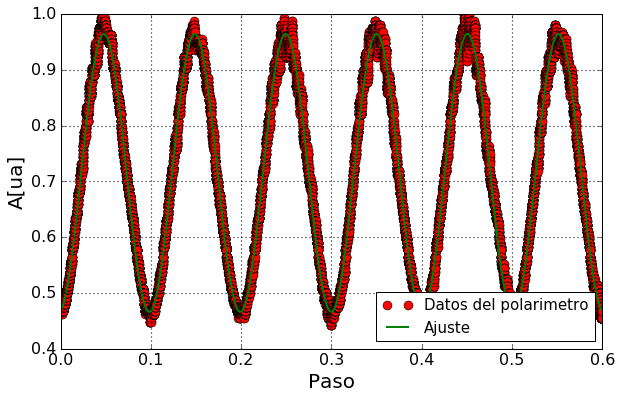

In [270]:
data = pd.read_csv("../polarimetro/mediciones/rojo/pol_fibra_rojo_sin_ruido.csv").values
#data = np.loadtxt('../polarimetro/mediciones/rojo/pol_fibra_rojo.csv', delimiter=',')

x = data[:,0] - data[:,0].min()
y = data[:,1] / data[:,1].max()

#ind = (y < 20) & (x < 500)
#x = x[ind]
#y = y[ind]

#y = sp.signal.savgol_filter(y, 11, 3)

plt.figure()
plt.tick_params(axis="both")
plt.xlabel("Paso")
plt.ylabel("A[ua]")

plt.plot(x, y, "ro", label="Datos del polarimetro")

p0 = [y.max(), 60, np.pi/2, 0]
p, cov = sp.optimize.curve_fit(cos_sq, x, y, p0 = p0)

t = np.linspace(x.min(),x.max(),1000)
plt.plot(t,cos_sq(t,*p),"g-", label="Ajuste")

#txt = "$\sigma$ = ({:.2f} $\pm$ {:.2f})mm".format(2*p[3]/1000, 2*np.sqrt(cov[3,3])/1000)
#plt.text(0.1,0.15, txt, transform=plt.gca().transAxes) 
#print("Error relativo {}".format(100 * np.sqrt(cov[3,3]) / (2 * p[3]) ))
#plt.savefig("calibracion.png", bbox_inches="tight")
plt.legend(loc=4)

print((y.max() - y.min())/(y.max() + y.min()))


0.936
0.0330578512397


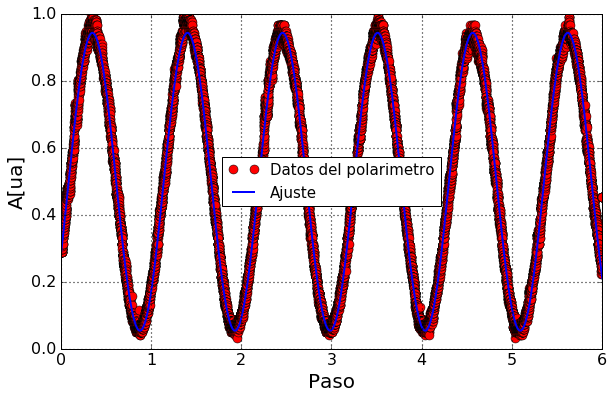

In [251]:
data = pd.read_csv("../polarimetro/mediciones/rojo/pol_laser_sin_ruido.csv").values
#data = np.loadtxt('../polarimetro/mediciones/rojo/pol_fibra_rojo.csv', delimiter=',')

x = data[:,0] - data[:,0].min()
y = data[:,1] / data[:,1].max()


#ind = (y < 20) & (x < 500)
#x = x[ind]
#y = y[ind]



plt.figure()
plt.tick_params(axis="both")
plt.xlabel("Paso")
plt.ylabel("A[ua]")



plt.plot(x, y, "ro", label="Datos del polarimetro")

p0 = [y.max(), 5, np.pi, 0]
p, cov = sp.optimize.curve_fit(cos_sq, x, y, p0 = p0)

t = np.linspace(x.min(),x.max(),1000)
plt.plot(t,cos_sq(t,*p),"b-", label="Ajuste")

#txt = "$\sigma$ = ({:.2f} $\pm$ {:.2f})mm".format(2*p[3]/1000, 2*np.sqrt(cov[3,3])/1000)
#plt.text(0.1,0.15, txt, transform=plt.gca().transAxes) 
#print("Error relativo {}".format(100 * np.sqrt(cov[3,3]) / (2 * p[3]) ))
#plt.savefig("calibracion.png", bbox_inches="tight")
plt.legend(loc=0)
print((y.max() - y.min())/(y.max() + y.min()))
print(y.min())

## Verde

0.996509598604
0.571


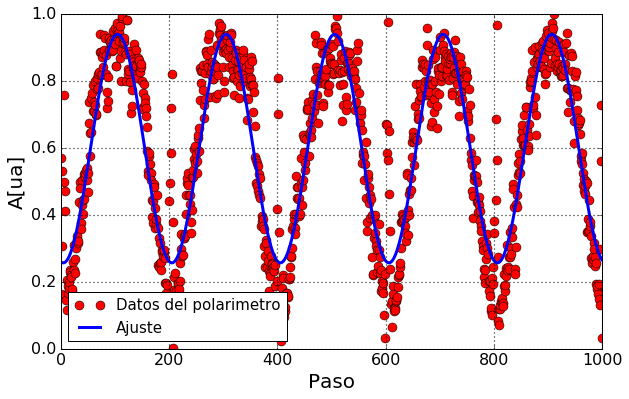

In [371]:
data = pd.read_csv("../polarimetro/mediciones/verde/pol_laser_verde_p_alt_ruido.csv").values
#data = np.loadtxt('../polarimetro/mediciones/rojo/pol_fibra_rojo.csv', delimiter=',')

x = data[:,0] - data[:,0].min()
y = data[:,1]


ind = (y < 20) & (x < 1000)
x = x[ind]
y = y[ind]


y = sp.signal.savgol_filter(y, 5, 3)

y /= y.max()

plt.figure()
plt.tick_params(axis="both")
plt.xlabel("Paso")
plt.ylabel("A[ua]")



plt.plot(x, y, "ro", label="Datos del polarimetro")

p0 = [y.max(), 1/40, np.pi/2, 0]
p, cov = sp.optimize.curve_fit(cos_sq, x, y, p0 = p0)

t = np.linspace(x.min(),x.max(),1000)
plt.plot(t,cos_sq(t, *p),"b-", label="Ajuste")

#txt = "$\sigma$ = ({:.2f} $\pm$ {:.2f})mm".format(2*p[3]/1000, 2*np.sqrt(cov[3,3])/1000)
#plt.text(0.1,0.15, txt, transform=plt.gca().transAxes) 
#print("Error relativo {}".format(100 * np.sqrt(cov[3,3]) / (2 * p[3]) ))
#plt.savefig("calibracion.png", bbox_inches="tight")
plt.legend(loc=0)
A = (y.max() - y.min())/(y.max() + y.min())
print(A)
print(A*(0.001/y.max() + 0.001/y.min()))

0.844479004666
0.576880269815


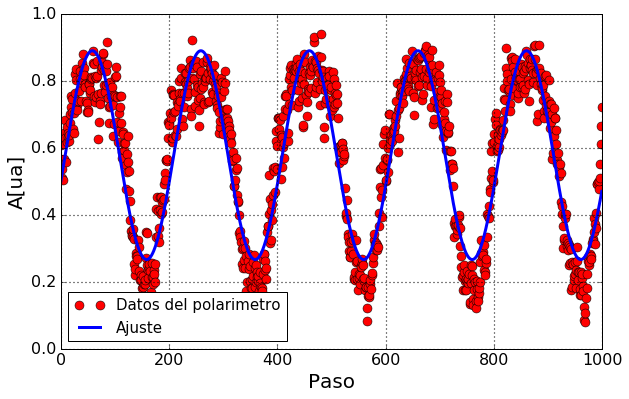

In [366]:
data = pd.read_csv("../polarimetro/mediciones/verde/pol_fibra_verde_alta_p.csv").values

x = data[:,0] - data[:,0].min()
y = data[:,1]


ind = x < 1000
x = x[ind]
y = y[ind]
y /= y.max()

y = sp.signal.savgol_filter(y, 5, 3)


plt.figure()
plt.tick_params(axis="both")
plt.xlabel("Paso")
plt.ylabel("A[ua]")



plt.plot(x, y, "ro", label="Datos del polarimetro")

p0 = [y.max(), 1/40, np.pi/2, 0]
p, cov = sp.optimize.curve_fit(cos_sq, x, y, p0 = p0)

t = np.linspace(x.min(),x.max(),1000)
plt.plot(t,cos_sq(t, *p),"b-", label="Ajuste")

#txt = "$\sigma$ = ({:.2f} $\pm$ {:.2f})mm".format(2*p[3]/1000, 2*np.sqrt(cov[3,3])/1000)
#plt.text(0.1,0.15, txt, transform=plt.gca().transAxes) 
#print("Error relativo {}".format(100 * np.sqrt(cov[3,3]) / (2 * p[3]) ))
plt.savefig("polarizacion_azul_fibra.png", bbox_inches="tight")
plt.legend(loc=0)
A = (y.max() - y.min())/(y.max() + y.min())
print(A)
print(A*(0.05/y.max() + 0.05/y.min()))

## Azul

0.833881578947
0.386277138925


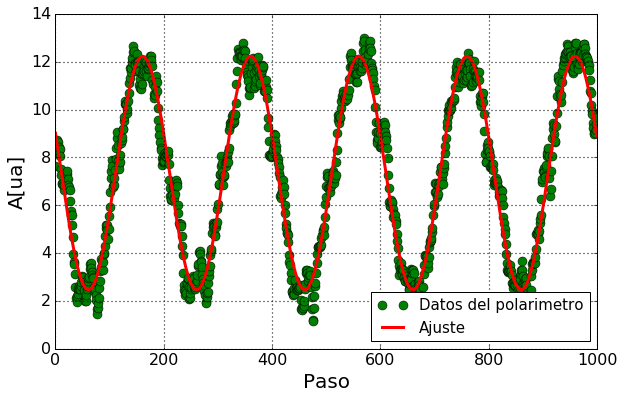

In [363]:
data = pd.read_csv("../polarimetro/mediciones/azul/pol_laser_azul_ruido.csv").values

x = data[:,0] - data[:,0].min()
y = data[:,1]


ind = x < 1000
x = x[ind]
y = y[ind]

y = sp.signal.savgol_filter(y, 11, 3)


plt.figure()
plt.tick_params(axis="both")
plt.xlabel("Paso")
plt.ylabel("A[ua]")



plt.plot(x, y, "go", label="Datos del polarimetro")

p0 = [y.max(), 1/40, np.pi/2,0]
p, cov = sp.optimize.curve_fit(cos_sq, x, y, p0 = p0)

t = np.linspace(x.min(),x.max(),1000)
plt.plot(t,cos_sq(t, *p),"r-", label="Ajuste")

#txt = "$\sigma$ = ({:.2f} $\pm$ {:.2f})mm".format(2*p[3]/1000, 2*np.sqrt(cov[3,3])/1000)
#plt.text(0.1,0.15, txt, transform=plt.gca().transAxes) 
#print("Error relativo {}".format(100 * np.sqrt(cov[3,3]) / (2 * p[3]) ))
plt.savefig("polarizacion_azul.png", bbox_inches="tight")
plt.legend(loc=0)
A = (y.max() - y.min())/(y.max() + y.min())
print(A)
print(A*(0.5/y.max() + 0.5/y.min()))

0.831481983202
0.313124536235


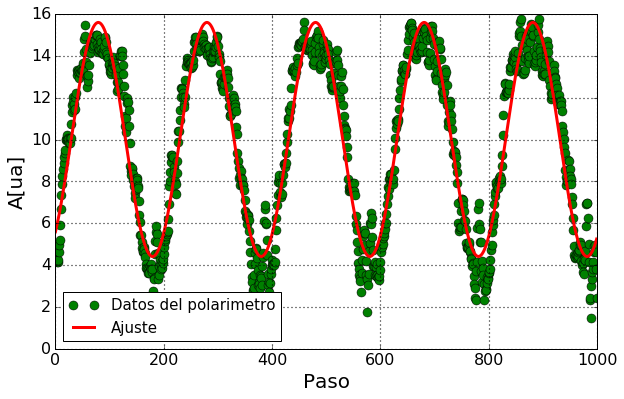

In [350]:
data = pd.read_csv("../polarimetro/mediciones/azul/pol_fibra_azul_baja_p_3.csv").values

x = data[:,0] - data[:,0].min()
y = data[:,1]


ind = x < 1000
x = x[ind]
y = y[ind]

y = sp.signal.savgol_filter(y, 11, 3)


plt.figure()
plt.tick_params(axis="both")
plt.xlabel("Paso")
plt.ylabel("A[ua]")



plt.plot(x, y, "go", label="Datos del polarimetro")

p0 = [y.max(), 1/40, np.pi/2,0]
p, cov = sp.optimize.curve_fit(cos_sq, x, y, p0 = p0)

t = np.linspace(x.min(),x.max(),1000)
plt.plot(t,cos_sq(t, *p),"r-", label="Ajuste")

#txt = "$\sigma$ = ({:.2f} $\pm$ {:.2f})mm".format(2*p[3]/1000, 2*np.sqrt(cov[3,3])/1000)
#plt.text(0.1,0.15, txt, transform=plt.gca().transAxes) 
#print("Error relativo {}".format(100 * np.sqrt(cov[3,3]) / (2 * p[3]) ))
plt.savefig("polarizacion_azul_fibra.png", bbox_inches="tight")
plt.legend(loc=0)
A = (y.max() - y.min())/(y.max() + y.min())
print(A)
print(A*(0.5/y.max() + 0.5/y.min()))